## SI

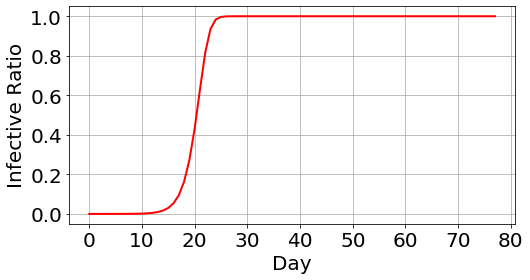

In [11]:
#SI

import numpy as np

import matplotlib.pyplot as plt

# poputation

N = 1e7

# simuation Time /Day
T = 78

# susceptiable ratio

s = np.zeros([T])
# infective ratio
i = np.zeros([T])
# contact rate
lamda = 0.8

# initial infective people
i[0] = 45.8 / N

for t in range(T - 1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t])
    
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20) 
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## SIS
和SI模型做比较，区别就是计算感染者的增加数时要减去被治愈的人数。所以这时候每天的增加的感染者为： $\lambda \times i N \times s-\gamma \times i N$, 增加的感染率为： $\lambda \times i \times s-\gamma i$。模型完成啦，修改python代码：

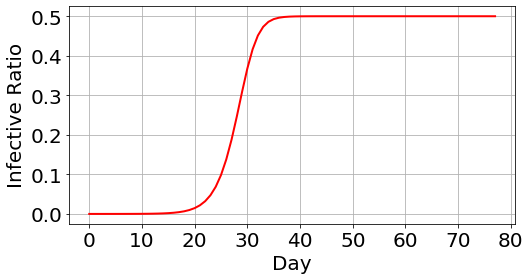

In [12]:
# SIS
#Susceptiable ratio
s = np.zeros([T])
#infective ratio
i = np.zeros([T])

# Contact rate
lamda = 1.0
# recover rate

gamma = 0.5

#initial infective people
i[0] = 45.0 / N

for t in range(T - 1):
    i[t + 1] = i[t] + i[t] * lamda * (1.0 - i[t]) - gamma * i[t]
    
fig, ax = plt.subplots(figsize=(8, 4)) 
ax.plot(i, c='r', lw=2)
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20) 
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## SIR

注意到这里，人群被分成了三类，不再只有I和S，所以相比于之前的模型，我们需要找到新的约束关系。现在我们需要分别计算三种人每天的增加量了：

易感者：每天都在被传染，所以一直在减少，减少量为被传染的人数：$\lambda N i s$
感染者：增加了被感染的人，减少了治愈的人： $\lambda N i s-\gamma N i$
移出者：增加了治愈的人： $\gamma N i$


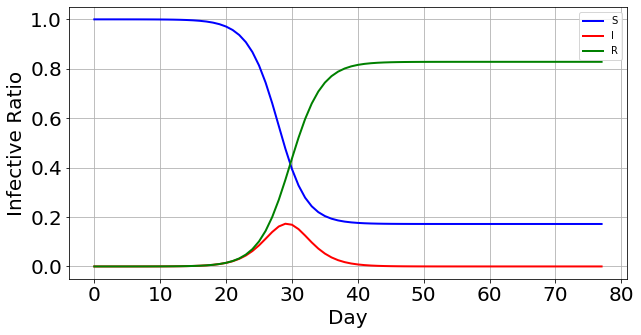

In [14]:
# susceptiable ratio :
s = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])

# contact rate
lamda = 1.0

# recover rate
gamma = 0.5

# initial infective people
i[0] = 45.0 / N
s[0] = 1 - i[0]

for t in range(T - 1):
    i[t + 1] = i[t] + i[t] * lamda * s[t] - gamma * i[t]
    s[t + 1] = s[t] - lamda * s[t] * i[t]
    r[t + 1] = r[t] + gamma * i[t]
# plot
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(s, c='b', lw=2,label='S')
ax.plot(i, c='r', lw=2,label='I')
ax.plot(r, c='g', lw=2,label='R')
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20) 
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

## SEIR

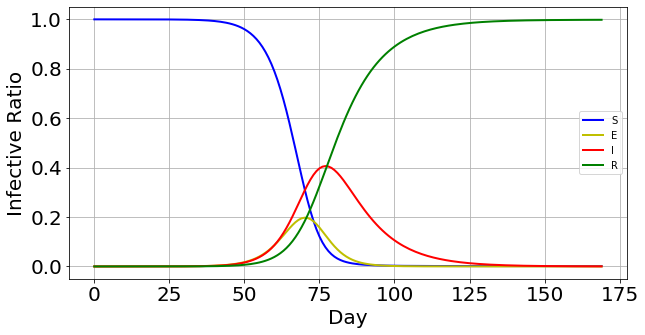

In [56]:
 
#population

N=1e7+10+5 # 城市人口总数=易感人群+初始感染+初始移出者

# simuation Time / Day
T =170 #时间

# susceptiable ratio
s = np.zeros([T])
# exposed ratio
e = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])
# contact rate
lamda = 0.5 # 每天传染的概率
# recover rate
gamma = 0.0821 # 治愈率
# exposed period
sigma =1/4 # 潜伏期的倒数
# sigmas = 1/(np.random.poisson(7,size=(T)))# 柏松分布


# initial infective people
i[0]=10.0/N
s[0]=1e7/N
e[0]=40.0/N

for t in range(T-1):
    s[t+1]=s[t]-lamda*s[t]*i[t]
    e[t+1]=e[t]+lamda*s[t]*i[t]-sigma*e[t]
    i[t+1]=i[t]+sigma*e[t]-gamma*i[t]
    r[t+1]=r[t]+gamma*i[t]

# plot    
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(s, c='b', lw=2,label='S')# 易感者
ax.plot(e, c='y', lw=2,label='E')# 潜伏者
ax.plot(i, c='r', lw=2,label='I')# 感染者
ax.plot(r, c='g', lw=2,label='R')# 移出者
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20) 
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

In [17]:
from openpyxl import load_workbook
 
workbook = load_workbook('数模数据.xlsx')
#booksheet = workbook.active                #获取当前活跃的sheet,默认是第一个sheet
sheets = workbook.get_sheet_names()         #从名称获取sheet
booksheet = workbook.get_sheet_by_name(sheets[0])
 
rows = booksheet.rows
columns = booksheet.columns
#迭代所有的行
for row in rows:
    line = [col.value for col in row]

#通过坐标读取值
cell_11 = booksheet.cell('A1').value
cell_11 = booksheet.cell(row=1, column=1).value

ModuleNotFoundError: No module named 'openpyxl'

In [1]:
import pandas as pd
df = pd.read_excel('数模数据.xlsx')

In [2]:
#  行数 （不包含表头，且一下均如此）
print(len(df.index.values))
# 行索引 
print(df.index.values)
#  列数
print(len(df.columns.values))
#  列索引
print(df.columns.values)

42
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
12
['时间' '新增确诊' '新增死亡' '新增出院' '新增疑似' '累计确诊病例' '累计死亡病例' '累计治愈出院' '现有疑似病例'
 '密切接触者' '解除医学观察' '正在接受医学观察']


In [4]:
#  表示第0行数据
day1 = df.iloc[0,[1,2,3,4,5,6,7,8,9,10,11]].values
print('第0行数据: \n', day1)
# #  读取多行数据（这里是第1行和第2行）
data = df.loc[[1, 2]].values
print('第1行和第2行数据: \n', data)

第0行数据: 
 [444 16 3 1118 1287 41 38 1965 15197 1230 13967]
第1行和第2行数据: 
 [[Timestamp('2020-01-25 00:00:00') 688 15 11 1309 1975 56 49 2684 23431
  325 21556]
 [Timestamp('2020-01-26 00:00:00') 769 24 2 3806 2744 80 51 5794 32799
  583 30453]]


In [5]:
import numpy as np
array1 = df.values
print(array1.shape)
array2 = np.array(df)
print(array2.shape)

(42, 12)
(42, 12)


In [7]:
array2[0][1:]

array([444, 16, 3, 1118, 1287, 41, 38, 1965, 15197, 1230, 13967],
      dtype=object)

In [16]:
array1[:,5]

array([1287, 1975, 2744, 4515, 5974, 7711, 9692, 11791, 14380, 17205,
       20438, 24324, 28018, 31161, 31774, 33738, 35982, 37626, 44653,
       52526, 55748, 56873, 68500, 70548, 58016, 57805, 74576, 54965,
       76288, 76936, 77150, 77658, 78064, 78497, 78824, 79251, 79824,
       80026, 80151, 80270, 80409, 80552], dtype=object)

.


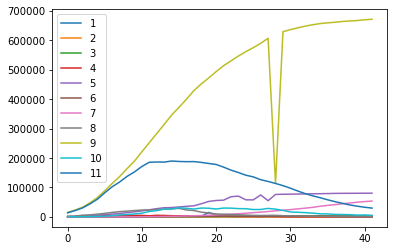

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# fonts = matplotlib.font_manager.FontProperties(fname='/home/prefer/Fonts/simhei.ttf', size=23)
print(matplotlib.Path())
array1 = df.values
# print(array1.shape)
X = np.array(range(42))

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# print(X)
for i in range(11):
    plt.plot(X, array1[:,i+1],label=str(i+1))
# plt.plot(X, array1[:,1],label=u'新增确诊')# 新增确诊
# plt.plot(X, array1[:,2],label=u'新增死亡')# 新增死亡
# plt.plot(X, array1[:,3],label=u'新增出院')# 新增出院
# plt.plot(X, array1[:,4],label=u'新增疑似')# 新增疑似
# plt.plot(X, array1[:,5],label=u'累计死亡')# 累计死亡

plt.legend()#prop=fonts
plt.show()

In [10]:
print(df.index.values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


In [11]:
print(df.columns.values[1])

新增确诊


'/Users/doublc.qluv/opt/anaconda3/envs/ana/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [31]:
sigmas = 1/(np.random.poisson(7,size=(T)))
sigmas

array([1.        , 0.11111111, 0.2       , 0.125     , 0.14285714,
       0.33333333, 0.25      , 0.2       , 0.2       , 0.14285714,
       0.11111111, 0.33333333, 0.33333333, 0.14285714, 0.125     ,
       0.2       , 0.25      , 0.25      , 0.33333333, 0.25      ,
       0.07692308, 0.1       , 0.07692308, 0.25      , 0.25      ,
       0.11111111, 0.16666667, 0.1       , 0.125     , 0.16666667,
       0.14285714, 0.11111111, 0.2       , 0.33333333, 0.125     ,
       0.14285714, 0.16666667, 0.16666667, 0.2       , 0.125     ,
       0.125     , 0.16666667, 0.16666667, 0.14285714, 0.25      ,
       0.125     , 0.16666667, 0.125     , 0.1       , 0.08333333,
       1.        , 0.125     , 0.125     , 0.125     , 0.125     ,
       0.1       , 0.11111111, 0.11111111, 0.11111111, 0.16666667,
       0.125     , 0.25      , 0.2       , 0.11111111, 0.25      ,
       0.14285714, 0.2       , 0.2       , 0.25      , 0.11111111,
       0.1       , 0.25      , 0.25      , 0.16666667, 0.11111

In [51]:
#population

# N=1e8+1287+38 # 城市人口总数=易感人群+初始感染+初始移出者
N=1e8+10+5
# simuation Time / Day
T =170 #时间

# susceptiable ratio
s = np.zeros([T])
# exposed ratio
e = np.zeros([T])
# infective ratio
i = np.zeros([T])
# remove ratio
r = np.zeros([T])
# contact rate
lamda = 0.5 # 每天传染的概率
# recover rate
gamma = 0.0821 # 治愈率
# exposed period
sigma =1/4 # 潜伏期的倒数
sigmas = 1/(np.random.poisson(7,size=(T)))# 柏松分布

# lamdas
# list1=[5690]#24前一天9507新增
# for i in range(41):
#     #print(array1[:,9][i])
#     p = array1[:,9][i+1]-array1[:,9][i]
#     list1.append(p)
# #   print(p)
    
# lamdas = array1[:,1]/list1

gammas = array1[:,7]/array1[:,5]

# i0 = float(array1[0,5])
# e0 = float(array1[0,8])
# initial infective people

i[0] = 10.0 / N
s[0] = 1e8 / N
e[0] = 40.0 / N

for t in range(T-1):
    s[t+1]=s[t]-lamda*s[t]*i[t]
    e[t+1]=e[t]+lamda*s[t]*i[t]-sigma*e[t]
    i[t+1]=i[t]+sigma*e[t]-gamma*i[t]
    r[t+1]=r[t]+gamma*i[t]

# plot    
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(s, c='b', lw=2,label='S')# 易感者
ax.plot(e, c='y', lw=2,label='E')# 潜伏者
ax.plot(i, c='r', lw=2,label='I')# 感染者
ax.plot(r, c='g', lw=2,label='R')# 移出者
ax.set_xlabel('Day', fontsize=20)
ax.set_ylabel('Infective Ratio', fontsize=20) 
ax.grid(1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

ValueError: setting an array element with a sequence.